In [1]:
import matplotlib.pyplot as plt
import numpy as np

errors = np.load("errors.npy")
labels = np.load("labels.npy")

affordance_prop_dict = {'[0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0]': 'Squid w Tentacles\nPartless OR Horseshoe',
                        '[2,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,2,0,0,0,0,0,0]': 'Lolliop w\nCube Ends Partless',
                        '[0,1,0,1,0,0,0,1,1,0,0,0,0,2,1,0,0,0,2,1,0,0,0,0,0]': 'Giant U w\nFlat Base Partless',
                        '[0,1,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0]': 'Big Curved Axe\nPartless',
                        '[0,1,0,1,0,0,0,0,0,2,0,0,1,0,1,0,1,0,2,1,0,0,0,0,0]': 'Sunflower Partless',
                        '[0,0,0,1,1,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0]': 'Air Horn',
                        '[0,2,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,0]': 'Corn Dog',
                        '[1,2,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0]': 'Giant Electric Plug',
                        '[0,1,0,0,0,1,0,0,2,0,0,0,1,0,2,0,0,1,0,0,0,0,1,0,0]': 'Ring w Tail End',
                        '[0,1,0,0,0,2,0,1,2,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0]': 'Ring w Inward Spokes',
                        '[0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0]': 'Large Ring w\nOutward Spokes',
                        '[0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0]': 'Tube w Cones',
                        '[0,2,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,0]': 'Thin Stick w Hammer End',
                        '[0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0]': 'Helix',
                        '[0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,2,0,0,0,0,0,0]': 'Giant Golf T',
                        '[0,0,0,1,0,1,0,0,0,2,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0]': 'Circle With Ring',
                        '[0,0,0,0,2,0,0,0,1,1,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0]': 'Palm Tree Partless',
                        '[0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,2,0,0,0,0,0,0]': 'Ladle',
                        '[0,2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0]': 'Plunger'}

In [2]:
def toKey(label):
    key = '['
    for x in label:
        if x == 0:
            key += '0,'
        elif abs(x - 0.33333334) < 0.01:
            key += '1,'
        elif abs(x - 0.66666669) < 0.01:
            key += '2,'
        elif abs(x - 1) < 0.01:
            key += '3,'
    key = key[:-1]
    key += ']'
    return key

counts = [0] * 25
sums = [0] * 25
values = list(affordance_prop_dict.values())
keys = list(affordance_prop_dict.keys())
for i, label in enumerate(labels):
    idx = keys.index(toKey(label))
    counts[idx] += 1
    sums[idx] += errors[i]

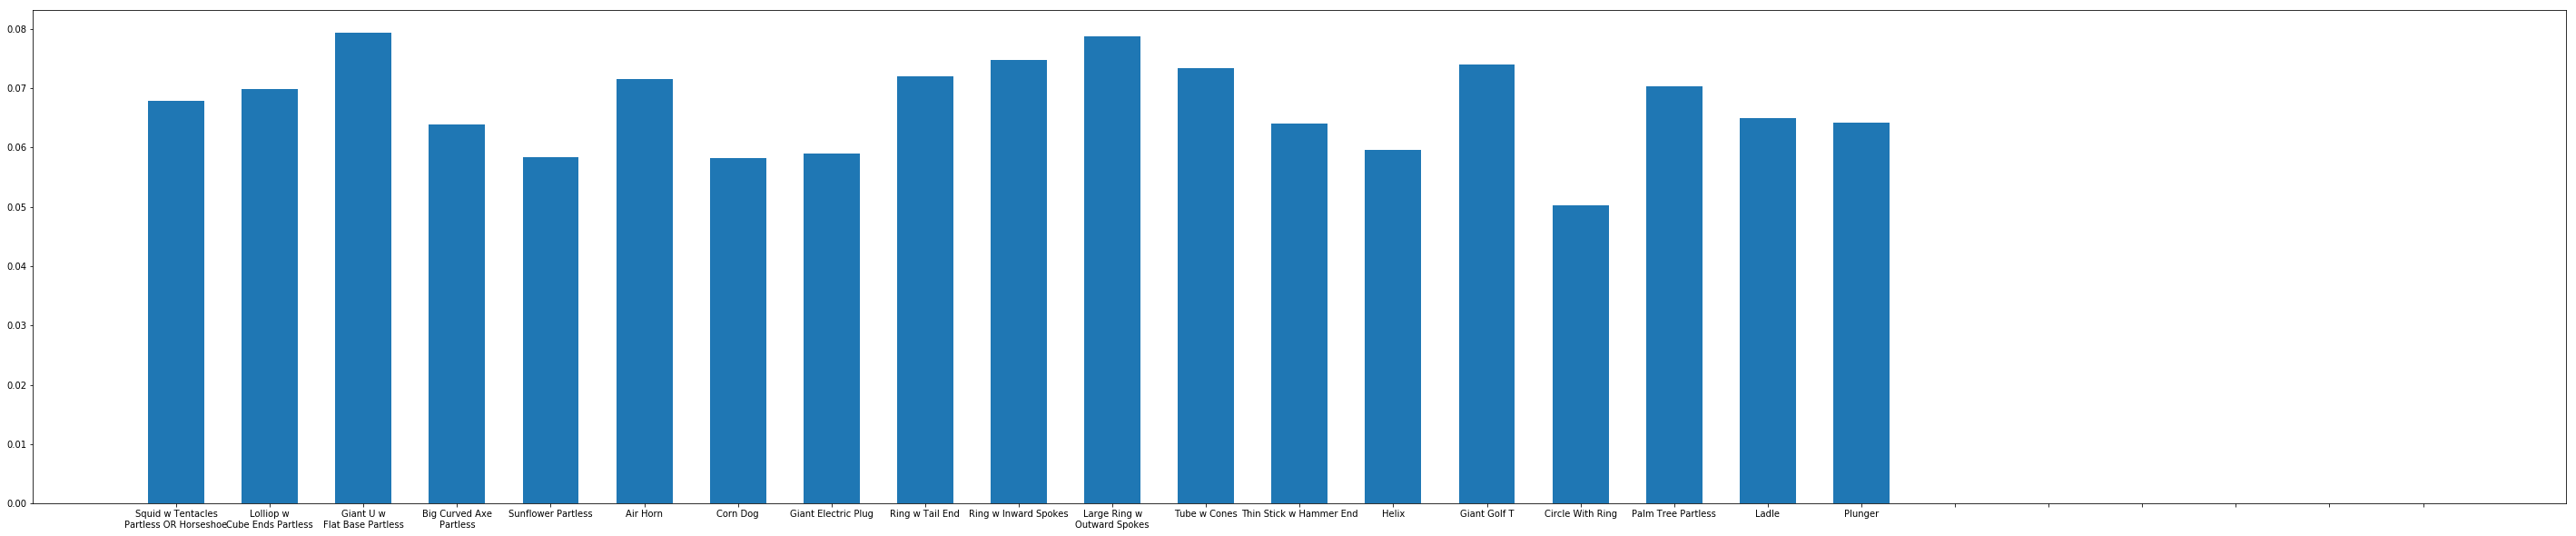

In [3]:
averages = [sums[i]/counts[i] if counts[i] > 0 else 0 for i in range(25)]

plt.figure(figsize=(50, 10))
plt.bar(range(25), averages, align='center', width=0.6)
plt.xticks(range(25), values)
plt.show()